In [1]:
# # 如果没有安装 matplotlib 和 pandas 可以将下面一行命令注释去掉之后并运行
# !pip install matplotlib pandas

# Part1 | 可视化简述

图与表一直以来都是相伴而生，因为用数据说话和「有图有真相」是两种各有利弊的信息呈现方式：

- 当有表（或数据）而没有图时，只能让人了解到真实的数据情况，但却无法让人直观地把握数据的具体形态如何；
- 当有图却没有表（或数据）时，只能让人了解到整体态势或粗略的情况，但却无法知道数据的真实情况如何。


In [2]:
from io import StringIO

import pandas as pd

data = StringIO("""\
ID	AAPL
1	105.049683034891
2	33.0931238483634
3	54.1970306609079
4	159.403766604101
5	167.358931996783
6	307.196223417759
7	215.364836100552
8	203.025256917158
9	290.668465669985
10	174.500121813321
11	171.610321459876
12	279.469359701337
""")

df = pd.read_csv(data, sep="\t")
df

,ID,AAPL
0,1,105.049683
1,2,33.093124
2,3,54.197031
3,4,159.403767
4,5,167.358932
5,6,307.196223
6,7,215.364836
7,8,203.025257
8,9,290.668466
9,10,174.500122


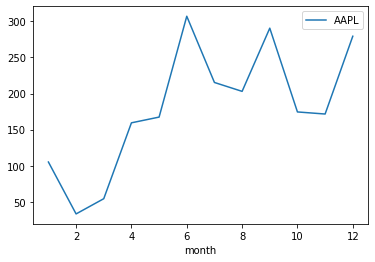

In [3]:
import matplotlib.pyplot as plt

ax = df.plot.line(
    x="ID", 
    y="AAPL", 
    xlabel="month", 
)

plt.show(ax)

## 什么是数据可视化？

> 可视化（Visualization）：指用图形、图像或动画等视觉形式来表示、呈现信息的手段或方法。


## 可视化选择参考

- [The Python Graph Gallery](https://www.python-graph-gallery.com/)
- [Financial Times - Visual vocabulary](https://github.com/Financial-Times/chart-doctor/blob/main/visual-vocabulary/Visual-vocabulary-chinese-simplified.pdf)



## 绘制可视化图形可能会用到的工具

- 报表与 BI 工具类：Excel、Tableau 等；
- 编程与统计软件：Python、Matlab、R、SAS；
- 视觉增强：Ae、PS 等。



## 可视化图形选择与绘制的基本准则

1. 🔢 **数据的结构**。字符串、数值、时间日期等。
2. 📊 **图形的基调**。条形图、饼图、直方图、折线图等。
3. 🤏🏻 **添加的「亿点点」细节**。标题、配色、图例、元素等。

# Part2 | Matplotlib

## Matplotlib 简介



![Image Name](https://cdn.kesci.com/upload/image/rfx8d6qhio.png?imageView2/0/w/960/h/960)

- 名称由来：Mat 表示 Matlab，Plot 表示图片，而 lib 则是 library 的缩写；
- 始于 2003 年，至今已有将近 20 年历史；
- 支持绘制的图形类型众多，自由定制化程度高。

## 前期准备：绘图前常用的魔法命令

In [4]:
# 行内模式与渲染精度
%matplotlib inline
%config InlineBackend.figure_format = "svg"

In [5]:
# 字体显示设置
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = "Source Han Serif"  # 如果需要在绘图时使用中文标签，需要事先找到对应的中文字体名称
plt.rcParams["axes.unicode_minus"] = False

Text(0, 0.5, '这是 Y 轴标签')

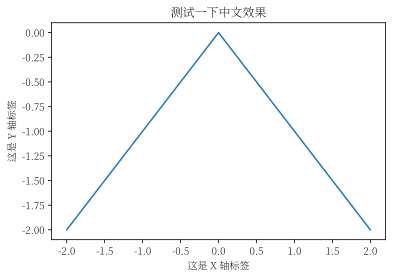

In [6]:
x = [-1, -2, 0, 1, 2]
y = [-1, -2, 0, -1, -2]
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("测试一下中文效果")
ax.set_xlabel("这是 X 轴标签")
ax.set_ylabel("这是 Y 轴标签")

## 基本概念

### Figure

In [7]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

### Axes

<Axes:>

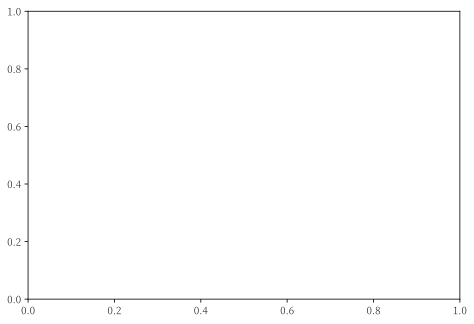

In [8]:
fig = plt.figure()
fig.add_axes([1, 1, 1, 1])

### Subplots

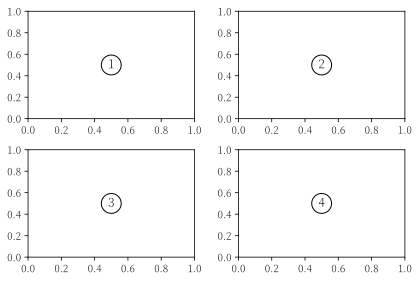

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# annotation
from itertools import chain
for pos, ax in enumerate(chain(*axes)):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    center = (
        abs(xlim[0] - xlim[1]) / 2,
        abs(ylim[0] - ylim[1]) / 2,
    )

    ax.text(center[0], center[1], s=f"{pos+1}",
            weight=1000, fontsize="large",
            ha="center", va="center",
            bbox=dict(boxstyle="circle", facecolor='none'))

plt.gcf().tight_layout()

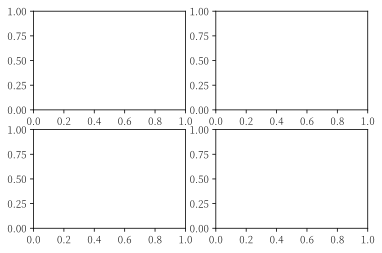

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
axes = [ax1, ax2, ax3, ax4]

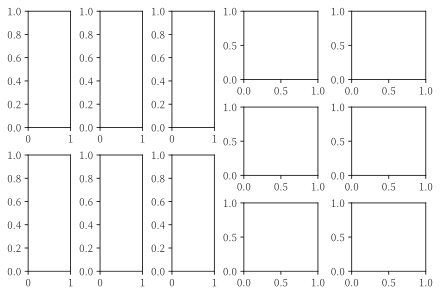

In [11]:
fig = plt.figure(constrained_layout=True)
gs0 = fig.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 3)
gs01 = gs0[1].subgridspec(3, 2)

for a in range(2):
    for b in range(3):
        fig.add_subplot(gs00[a, b])
        fig.add_subplot(gs01[b, a])

### Artist

Text(0, 0.5, 'Y Axis')

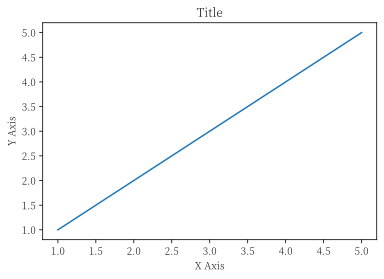

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = [1, 2, 3, 4, 5]
y = x

ax.plot(x, y)
ax.set_title("Title")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")

## Example

Text(0.5, 0, 'Subplot 2')

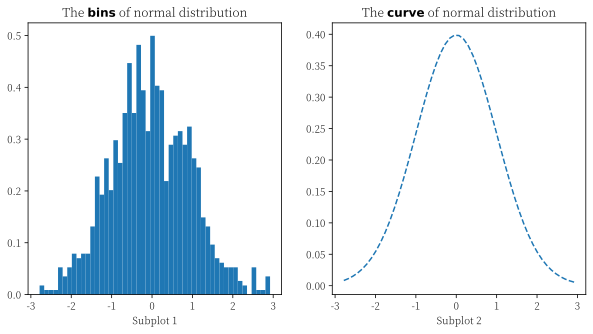

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(233)

fig, (ax1, ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(10, 5),
)
mu = 0
sigma = 1

x = [random.normalvariate(mu=mu, sigma=sigma) for _ in range(1000)]

_, bins, _ = ax1.hist(x, bins=50, density=True)
ax1.set_title(r"The $\bf{bins}$ of normal distribution")
ax1.set_xlabel("Subplot 1")

# ref: https://matplotlib.org/3.5.2/gallery/statistics/histogram_features.html#some-features-of-the-histogram-hist-function
fit_curve = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax2.plot(bins, fit_curve, linestyle="dashed")
ax2.set_title(r"The $\bf{curve}$ of normal distribution")
ax2.set_xlabel("Subplot 2")